In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import math
import matplotlib.pyplot as plt

In [2]:
linear_df = pd.read_csv("linear_19BCE0238.csv")
non_linear_df = pd.read_csv("non_linear_19BCE0238.csv")

In [3]:
X_linear = linear_df.iloc[:,:2]
y_linear = linear_df.iloc[:,-1]

X_non_linear = non_linear_df.iloc[:,:2]
y_non_linear = non_linear_df.iloc[:,-1]

In [5]:
def compute_linear_SVM(X, y):
    classifier = SVC(kernel='linear', C = 1.0)
    classifier.fit(X, y)
    
    x_component = round(classifier.coef_[0][0],2)
    y_component = round(classifier.coef_[0][1],2)
    bias = round(classifier.intercept_[0], 2)
    
    print("{0}*X + {1}*Y + {2}= 0".format(x_component, y_component, bias))

    return (classifier,x_component,y_component,bias)


Line Equation for linear SVM
1.0*X + -0.0*Y + -2.0= 0


<ipython-input-4-ed0fce26c6ec>:3: RuntimeWarning: divide by zero encountered in true_divide
  y = (-a*x - c)/b


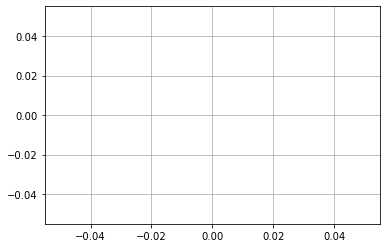

In [6]:
print("Line Equation for linear SVM")
linear_classifier = compute_linear_SVM(X_linear,y_linear)

In [7]:
def scale(tup):
    x1, x2 = tup
    if(math.sqrt((x1**2)+(x2**2)) > 2):
        return ((4-x2 + abs(x1-x2), 4-x1 + abs(x1-x2)))
    else:
        return ((x1,x2))
    
def compute_non_linear_SVM(X, y):
    data = X.copy()
    for _ in range(X.shape[0]):
        data.iloc[_,:] = scale(tuple(data.iloc[_,:]))
    values = compute_linear_SVM(data, y)
    return values

Line Equation for non linear SVM
1.0*X + 1.0*Y + -3.0= 0


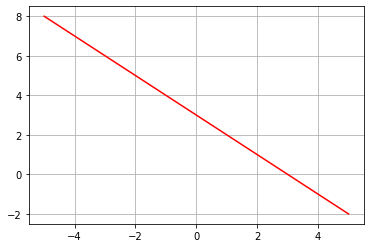

In [8]:
print("Line Equation for non linear SVM")
non_linear_classifier = compute_non_linear_SVM(X_non_linear, y_non_linear)